# References
https://machinelearningmastery.com/tutorial-first-neural-network-python-keras/  
https://www.neuraldesigner.com/learning/tutorials/testing-analysis/  
https://www.v7labs.com/blog/f1-score-guide

---
# Import Required Modules

In [1]:
# For data processing
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# For data visualization
import matplotlib.pyplot as plt
import seaborn as sb

# For Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.callbacks import EarlyStopping

# For Evaluation
from tensorflow.keras.metrics import Precision, Recall
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score


---
# User-Defined Functions

In [2]:
def get_weighted_sum(feature, weights, bias):
    return np.dot(feature, weights) + bias

def sigmoid(w_sum):
    return 1/ (1+ np.exp(-w_sum))

# Used to Visualise the Performance of a Model
def visualModelPerformance( outputTrain, outputTest, predictTrain, predictTest):

    f, ax = plt.subplots(ncols=2, figsize=(14, 4))
    f.suptitle( "Training vs Test Performance", fontweight='bold', fontsize='x-large')
    
    # Training set
    cf_train = confusion_matrix( outputTrain, predictTrain)
    sb.heatmap(cf_train, fmt='.0f', annot=True, ax=ax[0])
    
    # Calculate Train metrics
    accuracy_train = np.trace(cf_train) / float(np.sum(cf_train))
    precision_train = cf_train[1,1] / sum(cf_train[:,1])
    recall_train = cf_train[1,1] / sum(cf_train[1,:])
    f1_score_train = 2 * precision_train * recall_train / (precision_train + recall_train)
    
    stats_text_train = "\nAccuracy : {:0.2f}\nPrecision : {:0.2f}\nRecall : {:0.2f}\nF1 Score : {:0.2f}".format(
        accuracy_train, precision_train, recall_train, f1_score_train)
    
    ax[0].set(xlabel='Predicted' + stats_text_train, 
              ylabel='Actual', title='Training Performance')
    
    # Test set
    cf_test = confusion_matrix( outputTest, predictTest)
    sb.heatmap(cf_test, fmt='.0f', annot=True, ax=ax[1])
    
    # Calculate Test metrics
    accuracy_test = np.trace(cf_test) / float(np.sum(cf_test))
    precision_test = cf_test[1,1] / sum(cf_test[:,1])
    recall_test = cf_test[1,1] / sum(cf_test[1,:])
    f1_score_test = 2 * precision_test * recall_test / (precision_test + recall_test)
    
    stats_text_test = "\nAccuracy : {:0.2f}\nPrecision : {:0.2f}\nRecall : {:0.2f}\nF1 Score : {:0.2f}".format(
        accuracy_test, precision_test, recall_test, f1_score_test)
    
    ax[1].set(xlabel='Predicted' + stats_text_test, 
              ylabel='Actual', title='Test Performance')
    
    plt.show()
    
    return accuracy_test, precision_test, recall_test, f1_score_test

# Used to visualise the Performance of Models on new Data
def visualPerformance( outputValues, predictModel1, predictModel2, predictModel3, predictModel4):
    
    f, ax = plt.subplots(ncols=4, figsize=(14, 4))
    f.suptitle("Model Performances", fontweight='bold', fontsize='x-large')
    
    # CF For Models
    cf_Model1 = confusion_matrix( outputValues, predictModel1)
    sb.heatmap(cf_Model1, fmt='.0f', annot=True, ax=ax[0])

    cf_Model2 = confusion_matrix( outputValues, predictModel2)
    sb.heatmap(cf_Model2, fmt='.0f', annot=True, ax=ax[1])

    cf_Model3 = confusion_matrix( outputValues, predictModel3)
    sb.heatmap(cf_Model3, fmt='.0f', annot=True, ax=ax[2])

    cf_Model4 = confusion_matrix( outputValues, predictModel4)
    sb.heatmap(cf_Model4, fmt='.0f', annot=True, ax=ax[3])

    # Calculate Model Metrics
    accuracy_Model1 = np.trace(cf_Model1) / float(np.sum(cf_Model1))
    precision_Model1 = cf_Model1[1,1] / sum(cf_Model1[:,1])
    recall_Model1 = cf_Model1[1,1] / sum(cf_Model1[1,:])
    f1_score_Model1 = 2 * precision_Model1 * recall_Model1 / (precision_Model1 + recall_Model1)
    stats_text_Model1 = "\nAccuracy : {:0.2f}\nPrecision : {:0.2f}\nRecall : {:0.2f}\nF1 Score : {:0.2f}".format( 
        accuracy_Model1, precision_Model1, recall_Model1, f1_score_Model1)
    ax[0].set(xlabel='Predicted' + stats_text_Model1, 
              ylabel='Actual', title='Model 1')
    
    accuracy_Model2 = np.trace(cf_Model2) / float(np.sum(cf_Model2))
    precision_Model2 = cf_Model2[1,1] / sum(cf_Model2[:,1])
    recall_Model2 = cf_Model2[1,1] / sum(cf_Model2[1,:])
    f1_score_Model2 = 2 * precision_Model2 * recall_Model2 / (precision_Model2 + recall_Model2)
    stats_text_Model2 = "\nAccuracy : {:0.2f}\nPrecision : {:0.2f}\nRecall : {:0.2f}\nF1 Score : {:0.2f}".format(
        accuracy_Model2, precision_Model2, recall_Model2, f1_score_Model2)
    ax[1].set(xlabel='Predicted' + stats_text_Model2, 
              ylabel='Actual', title='Model 2')
    
    accuracy_Model3 = np.trace(cf_Model3) / float(np.sum(cf_Model3))
    precision_Model3 = cf_Model3[1,1] / sum(cf_Model3[:,1])
    recall_Model3 = cf_Model3[1][1] / sum(cf_Model3[1,:])
    f1_score_Model3 = 2 * precision_Model3 * recall_Model3 / (precision_Model3 + recall_Model3)
    stats_text_Model3 = "\nAccuracy : {:0.2f}\nPrecision : {:0.2f}\nRecall : {:0.2f}\nF1 Score : {:0.2f}".format(
        accuracy_Model3, precision_Model3, recall_Model3, f1_score_Model3)
    ax[2].set(xlabel='Predicted' + stats_text_Model3, 
              ylabel='Actual', title='Model 3')
    
    accuracy_Model4 = np.trace(cf_Model4) / float(np.sum(cf_Model4))
    precision_Model4 = cf_Model4[1,1] / sum(cf_Model4[:,1])
    recall_Model4 = cf_Model4[1,1] / sum(cf_Model4[1,:])
    f1_score_Model4 = 2 * precision_Model4 * recall_Model4 / (precision_Model4 + recall_Model4)
    stats_text_Model4 = "\nAccuracy : {:0.2f}\nPrecision : {:0.2f}\nRecall : {:0.2f}\nF1 Score : {:0.2f}".format(
        accuracy_Model4, precision_Model4, recall_Model4, f1_score_Model4)
    ax[3].set(xlabel='Predicted' + stats_text_Model4, 
              ylabel='Actual', title='Model 4')
    
    plt.show()
    return

# Neural Network Model Function

The Neural Network Model is designed for Binary Classification.  
The Model uses 3 Dense Layers of 64, 32 and 16. The layers are using ReLU (Rectified Linear Unit) activation function.  
The Final Layer consist of 1 Neuron with a sigmoid function.  

The Model uses the Adam optimizer and Binary_Crossentropy Loss Function.  
The Model also uses Early Stopping to prevent overfitting during training. It monitors the validation loss and stop the training when the loss is stable or starts to deteriorate. The model uses a patience of 3 Epochs for Early Stopping.

After the training is finished, the model is evaluated using visualModelPerformance. We check for Accuracy, Precision, Recall, F1 Score and Loss of the model and display the results.  

The trained Model is then return

In [3]:
#Neural Network Model
def NeuralNetwork(trainPredictor, testPredictor, trainResponse, testResponse, epoch):
    
    model = Sequential([
        Input(shape=(4,)),
        Dense(64, activation='relu'),
        Dense(32, activation='relu'),
        Dense(16, activation='relu'),
        Dense(1, activation='sigmoid')
    ])

    model.compile(optimizer = 'adam',
                  loss = 'binary_crossentropy',
                  metrics = ['accuracy'])
    
    # Define early stopping criteria
    early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
    
    model.fit(trainPredictor, trainResponse, 
              epochs = epoch, 
              batch_size = 32, 
              validation_data = (testPredictor, testResponse),
              callbacks = [early_stopping])
    
    #Evaluation
    predictOnTrain = (model.predict(trainPredictor) >= 0.5).astype('bool')
    predictOnTest = (model.predict(testPredictor) >= 0.5).astype('bool')
    loss, evalAccuracy = model.evaluate(testPredictor, testResponse)
    accuracy, precision, recall, f1_score = visualModelPerformance(trainResponse, testResponse, predictOnTrain, predictOnTest)
    print("Accuracy: ", accuracy)
    print("Precision: ", precision)
    print("Recall: ", recall)
    print("F1: ", f1_score)
    print("Loss: ", loss)
    
    return model

---
# Data Preparations

In [4]:
# Import and prepare dataset
baseDF = pd.read_csv("edaMovies.csv")

# Predictors / Inputs
modelPredictors = ["year", "votes", "score", "budget"]  
basePredictors = pd.DataFrame(baseDF[modelPredictors])

# Response / Output
modelResponse = ["Success"] 
baseResponse = pd.DataFrame(baseDF[modelResponse])

# Spliting the data into Input and Output Train/Test Sets
baseInputTrain, baseInputTest, baseOutputTrain, baseOutputTest = train_test_split(basePredictors, baseResponse, test_size = 0.25)

basePredictors.head(10)

,year,votes,score,budget
0,1980,927000.0,8.4,19000000.0
1,1980,65000.0,5.8,4500000.0
2,1980,1200000.0,8.7,18000000.0
3,1980,221000.0,7.7,3500000.0
4,1980,108000.0,7.3,6000000.0
5,1980,123000.0,6.4,550000.0
6,1980,188000.0,7.9,27000000.0
7,1980,330000.0,8.2,18000000.0
8,1980,101000.0,6.8,54000000.0
9,1980,10000.0,7.0,10000000.0


---
# Model 1: Base Inputs (No Normalising / Standardisation)

We first attempted to create a model using the unaltered Input Data to see the results of the model.  
The Model used a Epoch value of 15.

Epoch 1/15
128/128 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5557 - loss: 127073.1406 - val_accuracy: 0.5666 - val_loss: 9498.3857
Epoch 2/15
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5715 - loss: 10870.8340 - val_accuracy: 0.5636 - val_loss: 34031.4414
Epoch 3/15
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5608 - loss: 16408.5449 - val_accuracy: 0.5629 - val_loss: 14610.4609
Epoch 4/15
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5753 - loss: 15591.9512 - val_accuracy: 0.5622 - val_loss: 4359.2197
Epoch 5/15
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5734 - loss: 13123.8223 - val_accuracy: 0.5350 - val_loss: 22142.5410
Epoch 6/15
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5768 - loss: 20032.1426 - val_accuracy: 0.5629 - val_loss: 11953.1533
Epoch 7/15
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5822 - loss: 12511.9570 - val_accuracy: 0.5629 - val_loss: 14087.2715
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 841us/step
43/43 

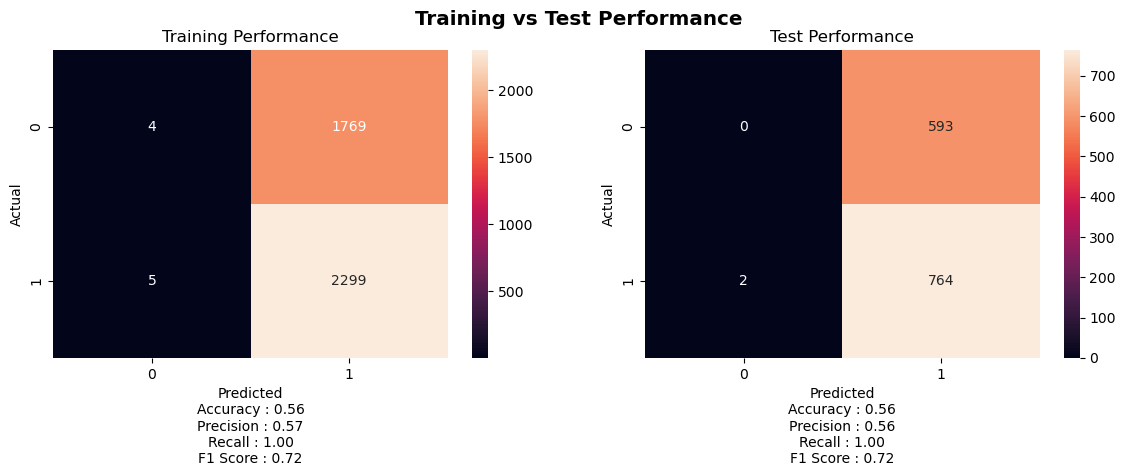

Accuracy:  0.5621780721118469
Precision:  0.5630066322770818
Recall:  0.9973890339425587
F1:  0.7197362223268959
Loss:  4359.2197265625


In [14]:
neuralModel = NeuralNetwork( baseInputTrain, baseInputTest, baseOutputTrain, baseOutputTest, 15)

# Evaluation of First Model 

From the model, the accuracy can be seen being around 0.56.    
From the performance of the model, we can see that there's a high recall value of around 1.0
Also, despite the model having a good F1 score of around 0.72, the model is actually returning almost TRUE for every prediction. 
This shows that the Model is not working as intended. 
Also there is a high loss value from the model which could be due to "Budget" column having huge numbers in it.

---
# Model 2: Normalising Budget Column

As we suspect the huge values of Budget may be causing an issue.  
We normalise the budget column to [0 - 1]  while the other input variables remain the same.

# Data Prepping for Model 2

In [6]:
# Normalized Budget
normaliser = MinMaxScaler()
nBudgetPredictors = basePredictors.copy()
nBudgetPredictors["budget"] = normaliser.fit_transform(basePredictors[["budget"]])
nBInputTrain, nBInputTest, nBOutputTrain, nBOutputTest = train_test_split( nBudgetPredictors, baseResponse, test_size = 0.25)
nBudgetPredictors.head(10)

,year,votes,score,budget
0,1980,927000.0,8.4,0.053355
1,1980,65000.0,5.8,0.012624
2,1980,1200000.0,8.7,0.050546
3,1980,221000.0,7.7,0.009815
4,1980,108000.0,7.3,0.016837
5,1980,123000.0,6.4,0.001528
6,1980,188000.0,7.9,0.075827
7,1980,330000.0,8.2,0.050546
8,1980,101000.0,6.8,0.151671
9,1980,10000.0,7.0,0.028074


Epoch 1/15
128/128 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5198 - loss: 900.8869 - val_accuracy: 0.5695 - val_loss: 5.0926
Epoch 2/15
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6583 - loss: 9.9477 - val_accuracy: 0.6946 - val_loss: 8.8269
Epoch 3/15
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6313 - loss: 44.6686 - val_accuracy: 0.6718 - val_loss: 22.8720
Epoch 4/15
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6637 - loss: 21.5961 - val_accuracy: 0.4386 - val_loss: 31.7809
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 878us/step
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 549us/step
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 538us/step - accuracy: 0.5677 - loss: 5.1896


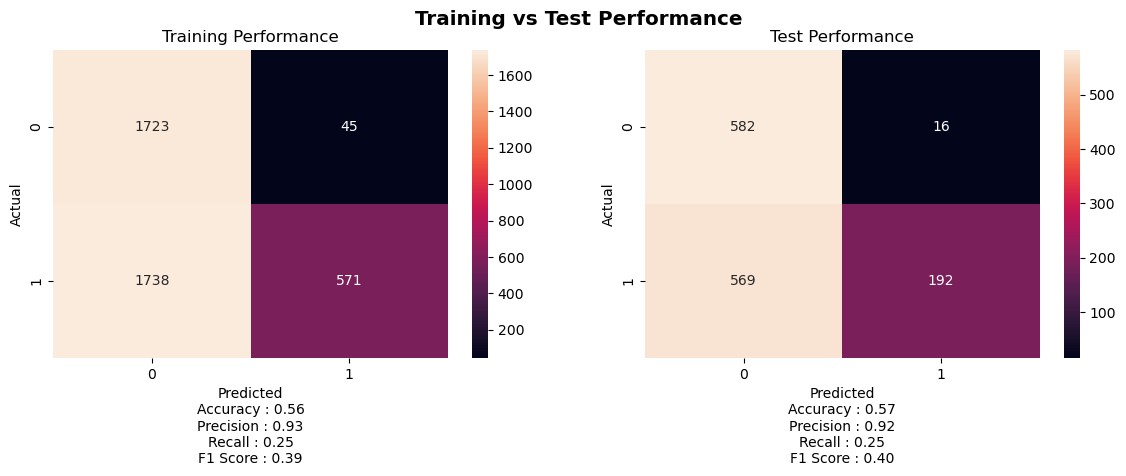

Accuracy:  0.5695364238410596
Precision:  0.9230769230769231
Recall:  0.25229960578186594
F1:  0.3962848297213622
Loss:  5.092556953430176


In [17]:
nBNeuralModel = NeuralNetwork( nBInputTrain, nBInputTest, nBOutputTrain, nBOutputTest, 15)

# Evaluation of Model 2

Model 2 shows similar accuracy and a significant lower loss compared to Model 1.
However from the performance, though it's no longer leaning to one side but the distribution is still leaning more towards all False. Seen from the high percentage of predictions being False. (Nearly 3/4 for the training performance)  
This would be the cause for the high precision but low recall values.
Also, the F1 Score of Model 2 is relatively low.

Thus, suggesting that the model is not fitted correctly.

---
# Model 3: Normalized Inputs

Here in Model 3, we are normalising all inputs rather than just budget.  
The reasoning is to ensure that during training that the weights are updated more consistently. As the backpropagations may vary widely due to the default inputs having different scale

In [8]:
# Normalized Inputs
normaliser = MinMaxScaler()
nPredictors = normaliser.fit_transform(basePredictors)
nInputTrain, nInputTest, nOutputTrain, nOutputTest = train_test_split( nPredictors, baseResponse, test_size = 0.25)
nPredictors

array([[0.        , 0.38620013, 0.87837838, 0.05335483],
       [0.        , 0.02700428, 0.52702703, 0.01262381],
       [0.        , 0.49995937, 0.91891892, 0.0505458 ],
       ...,
       [1.        , 0.02200387, 0.5       , 0.49156446],
       [1.        , 0.01742017, 0.66216216, 0.37920302],
       [1.        , 0.00146054, 0.66216216, 0.22470603]])

Epoch 1/15
128/128 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5702 - loss: 0.6665 - val_accuracy: 0.6203 - val_loss: 0.6309
Epoch 2/15
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6538 - loss: 0.6082 - val_accuracy: 0.7027 - val_loss: 0.5743
Epoch 3/15
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7009 - loss: 0.5719 - val_accuracy: 0.7233 - val_loss: 0.5480
Epoch 4/15
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6769 - loss: 0.5819 - val_accuracy: 0.6895 - val_loss: 0.5680
Epoch 5/15
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6949 - loss: 0.5763 - val_accuracy: 0.7285 - val_loss: 0.5405
Epoch 6/15
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7012 - loss: 0.5592 - val_accuracy: 0.7373 - val_loss: 0.5295
Epoch 7/15
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7208 - loss: 0.5333 - val_accuracy: 0.7380 - val_loss: 0.5292
Epoch 8/15
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7018 - loss: 0.5516 - val_accuracy: 0.

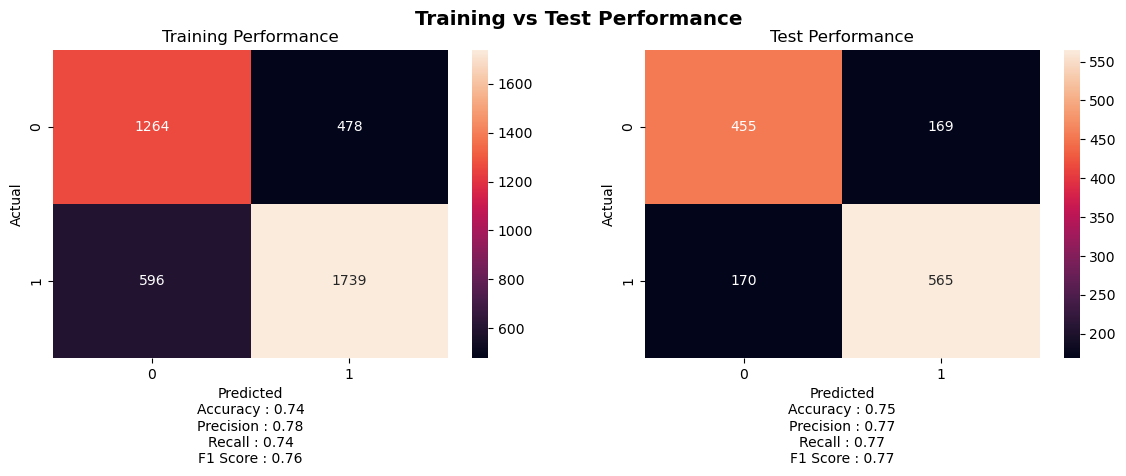

Accuracy:  0.7505518763796909
Precision:  0.7697547683923706
Recall:  0.7687074829931972
F1:  0.7692307692307692
Loss:  0.5103482604026794


In [24]:
nNeuralModel = NeuralNetwork( nInputTrain, nInputTest, nOutputTrain, nOutputTest, 15)

# Evaluation of Model 3

From Model 3, we can see a slightly more stable results.  
We can see a good accuracy of around 0.75 and a very small loss due to normalizing the inputs.  
The F1 Score of 0.77 indicates a good balance for the model. From the performance, we can see that the predictions are distributed more evenly.
With the Accuracy, Precision, Recall and F1 Score being relatively balance and high.  
Model 3 seems to be well-fitted and suitable for predictions

---
# Model 4: Standardised Inputs

In [10]:
# Standardised Inputs
standardiser = StandardScaler()
sPredictors = standardiser.fit_transform(basePredictors)
sInputTrain, sInputTest, sOutputTrain, sOutputTest = train_test_split( sPredictors, baseResponse, test_size = 0.25)
sPredictors

array([[-2.05406967,  4.40853051,  2.08424288, -0.4077288 ],
       [-2.05406967, -0.27094859, -0.61534062, -0.75675732],
       [-2.05406967,  5.89054651,  2.39573328, -0.43179973],
       ...,
       [ 1.74070092, -0.33609215, -0.82300089,  3.34733664],
       [ 1.74070092, -0.39580708,  0.42296072,  2.38449935],
       [ 1.74070092, -0.60372361,  0.42296072,  1.06059807]])

Epoch 1/15
128/128 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6107 - loss: 0.6509 - val_accuracy: 0.6762 - val_loss: 0.5844
Epoch 2/15
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6942 - loss: 0.5812 - val_accuracy: 0.7248 - val_loss: 0.5446
Epoch 3/15
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7202 - loss: 0.5310 - val_accuracy: 0.7299 - val_loss: 0.5226
Epoch 4/15
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7229 - loss: 0.5280 - val_accuracy: 0.7432 - val_loss: 0.5114
Epoch 5/15
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7394 - loss: 0.5211 - val_accuracy: 0.7403 - val_loss: 0.5025
Epoch 6/15
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7293 - loss: 0.5218 - val_accuracy: 0.7491 - val_loss: 0.4945
Epoch 7/15
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7439 - loss: 0.5058 - val_accuracy: 0.7520 - val_loss: 0.4910
Epoch 8/15
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7491 - loss: 0.5017 - val_accuracy: 0.

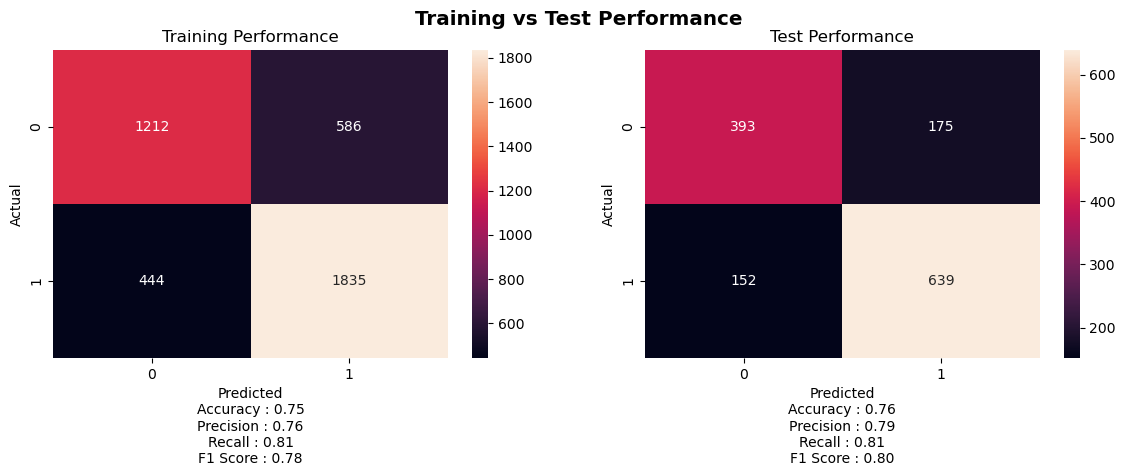

Accuracy:  0.7593818984547461
Precision:  0.785012285012285
Recall:  0.8078381795195955
F1:  0.7962616822429908
Loss:  0.4791036546230316


In [26]:
sNeuralModel = NeuralNetwork( sInputTrain, sInputTest, sOutputTrain, sOutputTest, 15)

# Evaluation of Model 4

From Model 4, a rather balanced results similar to Model 3.

We can see a good accuracy of around 0.745 and a very small loss due to standardising the inputs.  
The F1 Score of around 0.77 indicates a good balance for the model. From the performance, we can see that the predictions are distributed more evenly.
With the Accuracy, Precision, Recall and F1 Score being relatively balance and high.  
Model 4 also seems to be well-fitted and suitable for predictions

---
# Testing Models Against New Data

## Data Set One

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 509us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 587us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 533us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 534us/step


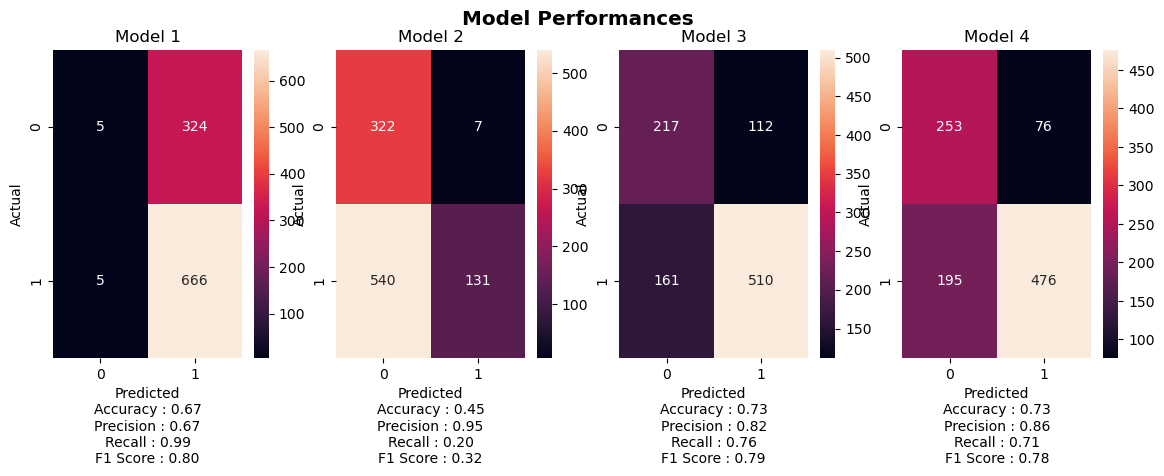

In [27]:
newDataOne = pd.read_csv("testDataOne.csv")

newDataOneInput = newDataOne.copy().drop(columns=['Success','release_date','revenue'])
newDataOneInput = newDataOneInput.rename(columns={'budget':'budget',"vote_average":'score',"vote_count":'votes','year':'year'})
newDataOneInput = newDataOneInput[['year','votes', 'score', 'budget']]
newDataOneInput["votes"] = newDataOneInput["votes"]*100 #the data retrieved scaled down the votes
newDataOneOutput = newDataOne["Success"].copy()

testD1M1 = newDataOneInput.copy()
testD1M2 = newDataOneInput.copy()
testD1M2["budget"] = normaliser.fit_transform(newDataOneInput[["budget"]])
testD1M3 = normaliser.fit_transform(newDataOneInput)
testD1M4 = standardiser.fit_transform(newDataOneInput)

predictD1M1 = (neuralModel.predict(testD1M1) >= 0.5).astype('bool')
predictD1M2 = (nBNeuralModel.predict(testD1M2) >= 0.5).astype('bool')
predictD1M3 = (nNeuralModel.predict(testD1M3) >= 0.5).astype('bool')
predictD1M4 = (sNeuralModel.predict(testD1M4) >= 0.5).astype('bool')

visualPerformance(newDataOneOutput, predictD1M1, predictD1M2, predictD1M3, predictD1M4)

---
## Data Set Two

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 525us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 503us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 616us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 544us/step


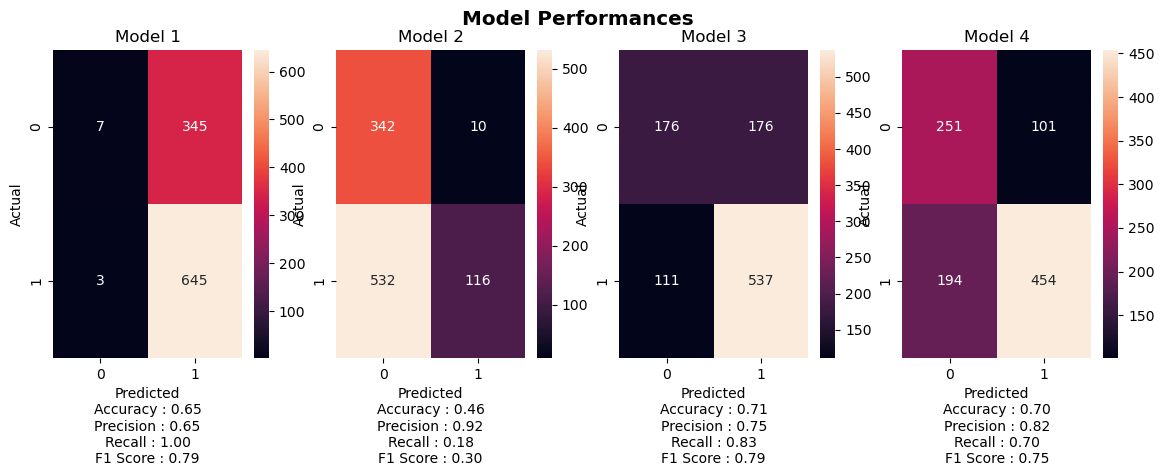

In [28]:
newDataTwo = pd.read_csv("testDataTwo.csv")

newDataTwoInput = newDataTwo.copy().drop(columns=['Success','release_date','revenue'])
newDataTwoInput = newDataTwoInput.rename(columns={'budget':'budget',"vote_average":'score',"vote_count":'votes','year':'year'})
newDataTwoInput = newDataTwoInput[['year','votes', 'score', 'budget']]
newDataTwoInput["votes"] = newDataTwoInput["votes"]*100 #the data retrieved scaled down the votes
newDataTwoOutput = newDataTwo["Success"].copy()

testD2M1 = newDataTwoInput.copy()
testD2M2 = newDataTwoInput.copy()
testD2M2["budget"] = normaliser.fit_transform(newDataTwoInput[["budget"]])
testD2M3 = normaliser.fit_transform(newDataTwoInput)
testD2M4 = standardiser.fit_transform(newDataTwoInput)

predictD2M1 = (neuralModel.predict(testD2M1) >= 0.5).astype('bool')
predictD2M2 = (nBNeuralModel.predict(testD2M2) >= 0.5).astype('bool')
predictD2M3 = (nNeuralModel.predict(testD2M3) >= 0.5).astype('bool')
predictD2M4 = (sNeuralModel.predict(testD2M4) >= 0.5).astype('bool')

visualPerformance(newDataTwoOutput, predictD2M1, predictD2M2, predictD2M3, predictD2M4)

---
# Conclusion

From the two new data sets, 
Model 3 and Model 4 have very similar accuracy.  
Model 3 has lower precision compared to Model 4. Thus, Model 4 is better in correctly identifying positive instances.  
Model 3 has higher recall compared to Model 4. Thus, Model 3 captures a larger proportion of positive instances.  
However, Model 3 have a higher F1 Score compared to Model 4. Thus, Model 3 achieves a better overall balance compared to Model 4.

In Conclusion, Model 3 would be be the preferred choice for making predictions on whether a movie is successful based on certain variables.

---
